In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import numpy as np


In [2]:
traindata=pd.read_csv(r'C:\Users\HP\Desktop\Churn_Prediction\churn-bigml-80.csv')
testdata=pd.read_csv(r'C:\Users\HP\Desktop\Churn_Prediction\churn-bigml-20.csv')

In [3]:
traindata.head(5) 

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
testdata.head(5) 

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [5]:
traindata.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [6]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
State                     2666 non-null object
Account length            2666 non-null int64
Area code                 2666 non-null int64
International plan        2666 non-null object
Voice mail plan           2666 non-null object
Number vmail messages     2666 non-null int64
Total day minutes         2666 non-null float64
Total day calls           2666 non-null int64
Total day charge          2666 non-null float64
Total eve minutes         2666 non-null float64
Total eve calls           2666 non-null int64
Total eve charge          2666 non-null float64
Total night minutes       2666 non-null float64
Total night calls         2666 non-null int64
Total night charge        2666 non-null float64
Total intl minutes        2666 non-null float64
Total intl calls          2666 non-null int64
Total intl charge         2666 non-null float64
Customer service calls    2666 non-null int64


In [7]:
traindata["Churn"].unique()
traindata["Churn"] = traindata["Churn"].astype("category")
le = LabelEncoder()
traindata["Churn"] = le.fit_transform(traindata["Churn"])
traindata["Churn"] = traindata["Churn"].astype("category") 


In [8]:
traindata["International plan"].unique()
traindata["International plan"] = traindata["International plan"].astype("category")
traindata["International plan"] = le.fit_transform(traindata["International plan"])

In [9]:
traindata["Voice mail plan"].unique()
traindata["Voice mail plan"] = traindata["Voice mail plan"].astype("category")
traindata["Voice mail plan"] = le.fit_transform(traindata["Voice mail plan"])

In [10]:
testdata["Churn"].unique()
testdata["Churn"] = testdata["Churn"].astype("category")
le = LabelEncoder()
testdata["Churn"] = le.fit_transform(testdata["Churn"])
testdata["Churn"] = testdata["Churn"].astype("category") 


testdata["International plan"].unique()
testdata["International plan"] = testdata["International plan"].astype("category")
testdata["International plan"] = le.fit_transform(testdata["International plan"])

In [11]:
testdata["Voice mail plan"].unique()
testdata["Voice mail plan"] = testdata["Voice mail plan"].astype("category")
testdata["Voice mail plan"] = le.fit_transform(testdata["Voice mail plan"])


In [12]:
print ("churn")
print(traindata['Churn'].unique())

churn
[0, 1]
Categories (2, int64): [0, 1]


<function matplotlib.pyplot.show(*args, **kw)>

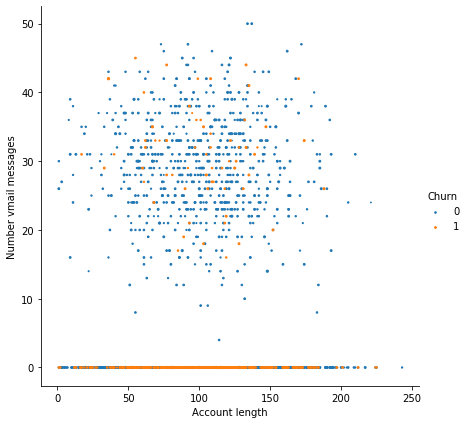

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.FacetGrid(traindata, hue='Churn', size=6)\
    .map(plt.scatter, "Account length","Number vmail messages","Total intl charge")\
    .add_legend()
plt.show

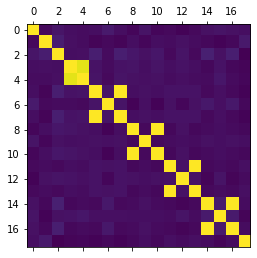

In [17]:
import matplotlib.pyplot as plt
plt.matshow(traindata.corr())
plt.show()

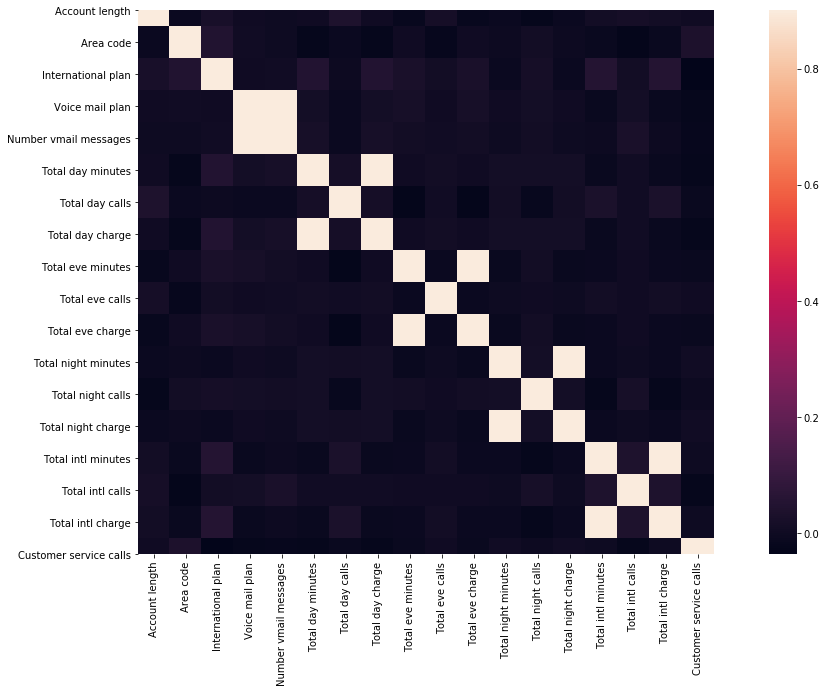

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
corrmat = traindata.corr()
plt.subplots(figsize=(20, 10))
sns.heatmap(corrmat, vmax=.9, square=True)

In [19]:
xtrain = traindata.iloc[: , 1:19].values
ytrain = traindata['Churn']

xtest = testdata.iloc[: , 1:19].values
ytest = testdata['Churn']

#X_train,X_test,y_train,y_test = train_test_split(x, y,test_size=0.2)

In [20]:
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(xtrain,ytrain)
#Predict the response for test dataset
y_pred = clf.predict(xtest)
acc1 = metrics.accuracy_score(ytest, y_pred)
matrix=confusion_matrix(ytest,y_pred)

In [21]:
from sklearn.metrics import classification_report
result1 = classification_report(ytest, y_pred)
print("Classification Report:",)
print (result1)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       572
           1       0.67      0.73      0.70        95

    accuracy                           0.91       667
   macro avg       0.81      0.83      0.82       667
weighted avg       0.91      0.91      0.91       667



In [22]:
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
clf=RandomForestClassifier()
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(xtrain,ytrain)
y_pred2=clf.predict(xtest)
acc2 = metrics.accuracy_score(ytest, y_pred2)
matrix2=confusion_matrix(ytest,y_pred2)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [23]:
from sklearn.metrics import classification_report
result2 = classification_report(ytest, y_pred2)
print("Classification Report 2:",)
print (result2)

Classification Report 2:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       572
           1       0.93      0.66      0.77        95

    accuracy                           0.94       667
   macro avg       0.94      0.83      0.87       667
weighted avg       0.94      0.94      0.94       667

